In [ ]:
!pip install gymnasium swig
!pip install gymnasium[box2d]

### Importando as bibliotecas necessárias

In [ ]:
import tensorflow as tf
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib
from matplotlib import animation
import matplotlib.patches as mpatches

### Função para exibição do vídeo

In [ ]:
def display_video(frames):
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    matplotlib.use(orig_backend)
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])
    def update(frame):
        im.set_data(frame)
        return [im]
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                    interval=50, blit=True, repeat=False)
    return HTML(anim.to_html5_video())

### Experimento com ações aleatórias para garantir o entendimento da dinâmica do ambiente e o funcionamento da função de exibição de vídeo

0
Episode 0 finished after 100 timesteps
Reward: 2.1212121212121358
0
Episode 1 finished after 100 timesteps
Reward: 3.2450331125828047
0
Episode 2 finished after 100 timesteps
Reward: 3.377926421404706
0
Episode 3 finished after 100 timesteps
Reward: 3.245033112582801
0
Episode 4 finished after 100 timesteps
Reward: 3.5593220338983307


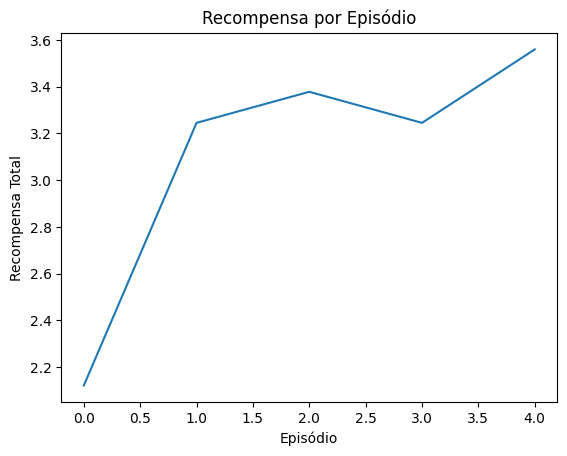

In [ ]:
env = gym.make("CarRacing-v2", render_mode="rgb_array")

total_episodes = 5
rewards = []
frames = []

for i_episode in range(total_episodes):
    observation, info = env.reset()
    sum_reward = 0
    img = env.render()
    frames.append(img)

    for t in range(100):
        action = env.action_space.sample()
        observation, reward, done, truncated, _ = env.step(action)
        sum_reward += reward

        img = env.render()
        frames.append(img)

        if(t % 100 == 0):
            print(t)
        if done or t == 99:
            print("Episode {} finished after {} timesteps".format(i_episode, t+1))
            print("Reward: {}".format(sum_reward))
            rewards.append(sum_reward)
        if done:
            break


plt.plot(rewards)
plt.title('Recompensa por Episódio')
plt.xlabel('Episódio')
plt.ylabel('Recompensa Total')
plt.show()

In [ ]:
display_video(frames)